In [105]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q htt  https://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (120 kB/s

# Read the data

In [106]:
df=spark.read.format("csv").option("header","true").option("inferschema","true").load("/content/Mall_Customers.csv");
df.show()

+----------+------+---+------------+-------------+
|CustomerID|Gender|Age|AnnualIncome|SpendingScore|
+----------+------+---+------------+-------------+
|         1|  Male| 19|          15|           39|
|         2|  Male| 21|          15|           81|
|         3|Female| 20|          16|            6|
|         4|Female| 23|          16|           77|
|         5|Female| 31|          17|           40|
|         6|Female| 22|          17|           76|
|         7|Female| 35|          18|            6|
|         8|Female| 23|          18|           94|
|         9|  Male| 64|          19|            3|
|        10|Female| 30|          19|           72|
|        11|  Male| 67|          19|           14|
|        12|Female| 35|          19|           99|
|        13|Female| 58|          20|           15|
|        14|Female| 24|          20|           77|
|        15|  Male| 37|          20|           13|
|        16|  Male| 22|          20|           79|
|        17|Female| 35|        

In [107]:
df.columns

['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [108]:
dataf=df.select('AnnualIncome', 'SpendingScore');

In [109]:
ag=dataf.toPandas()

In [110]:
ag.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [111]:
from sklearn.cluster import KMeans;
from sklearn.preprocessing import scale;#Center to the mean and component wise scale to unit variance.

In [112]:
wcss=[];
k=range(2,10);

In [113]:
for ka in k:
  model=KMeans(n_clusters=ka);
  model.fit(scale(ag));
  dsa=model.inertia_;#Sum of squared distances of samples to their closest cluster center.
  wcss.append(dsa);

In [114]:
import  matplotlib.pyplot as plt; 

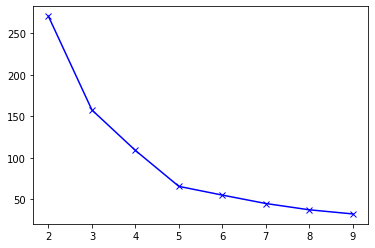

In [115]:
plt.plot(k,wcss,'bx-')

In [116]:
model=KMeans(n_clusters=5)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
model.fit(scale(ag))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [118]:
bmhs=model.labels_
bmhs

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [119]:
model.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

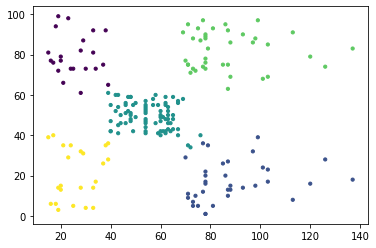

In [124]:
plt.scatter(ag.AnnualIncome, ag.SpendingScore,s=10, c=bmhs);